In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./fuel-efficiency-new-vehicles.csv')
# assuming your DataFrame is called df
df['mpg'] = df['fuel_efficiency_per_km'] * 2.35214583

df.shape

(307, 5)

In [4]:
df.describe()

,Year,fuel_efficiency_per_km,mpg
count,307.000000,307.000000,307.000000
mean,2010.442997,5.737187,13.494700
std,5.544164,0.904812,2.128250
min,2001.000000,4.213302,9.910301
25%,2006.000000,4.991370,11.740431
50%,2011.000000,5.635427,13.255346
75%,2015.000000,6.390336,15.031002
max,2019.000000,8.313367,19.554251


In [9]:
df.dtypes

Country                    object
Code                       object
Year                        int64
fuel_efficiency_per_km    float64
mpg                       float64
dtype: object

In [5]:
df.head()

,Country,Code,Year,fuel_efficiency_per_km,mpg
0,Austria,AUT,2001,6.467103,15.211570
1,Austria,AUT,2002,6.352750,14.942594
2,Austria,AUT,2003,6.310281,14.842701
3,Austria,AUT,2004,6.287208,14.788429
4,Austria,AUT,2005,6.423411,15.108799


In [6]:
# Assuming your original DataFrame is called df
# Calculate the average and sum by year for both "fuel_efficiency_per_km" and "mpg"
avg_fuel_efficiency_per_km_by_year = df.groupby('Year')['fuel_efficiency_per_km'].mean()
sum_fuel_efficiency_per_km_by_year = df.groupby('Year')['fuel_efficiency_per_km'].sum()
avg_mpg_by_year = df.groupby('Year')['mpg'].mean()
sum_mpg_by_year = df.groupby('Year')['mpg'].sum()

# Create a new DataFrame to store the results
new_df = pd.DataFrame({
    'avg_per_km': avg_fuel_efficiency_per_km_by_year,
    'sum_per_km': sum_fuel_efficiency_per_km_by_year,
    'avg_mpg': avg_mpg_by_year,
    'sum_mpg': sum_mpg_by_year
})


In [7]:
new_df.head()

,avg_per_km,sum_per_km,avg_mpg,sum_mpg
Year,,,,
2001,6.932226,103.983388,16.305606,244.584093
2002,6.821921,102.328813,16.046153,240.692291
2003,6.779550,101.693255,15.946491,239.197365
2004,6.680622,100.209337,15.713798,235.706973
2005,6.617994,99.269915,15.566488,233.497317


In [8]:
new_df.describe()

,avg_per_km,sum_per_km,avg_mpg,sum_mpg
count,19.000000,19.000000,19.000000,19.000000
mean,5.799354,92.700861,13.640926,218.045943
std,0.799689,7.086527,1.880985,16.668545
min,4.777754,79.141836,11.237974,186.153139
25%,5.030916,87.788474,11.833448,206.491293
50%,5.728399,91.268730,13.474029,214.677363
75%,6.580046,98.700694,15.477228,232.158427
max,6.932226,103.983388,16.305606,244.584093


In [ ]:
## Plot (sum) fuel efficiency per km by year

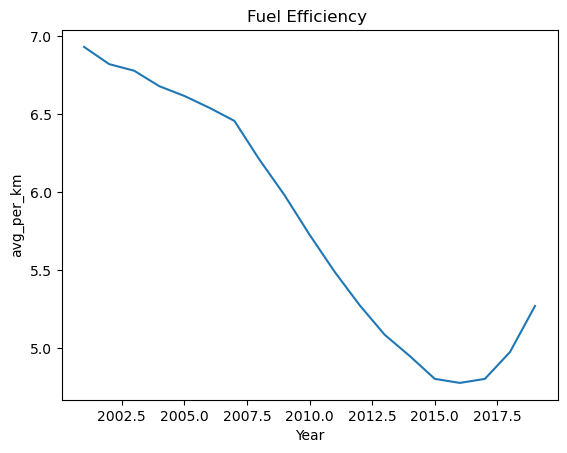

In [10]:
sns.lineplot(x='Year',y='avg_per_km',data=new_df)
plt.title('Fuel Efficiency avg_per_km')
plt.show()

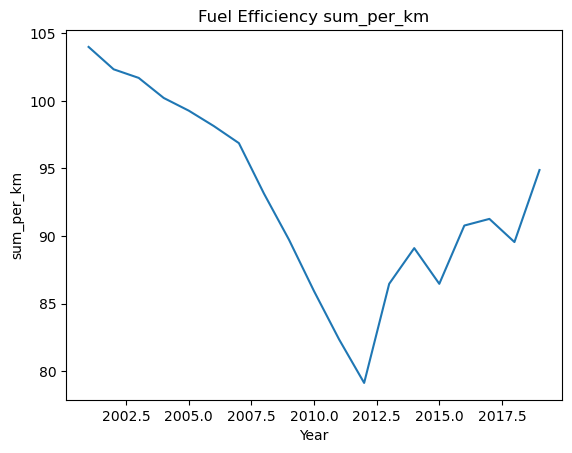

In [11]:
sns.lineplot(x='Year',y='sum_per_km',data=new_df)
plt.title('Fuel Efficiency sum_per_km')
plt.show()

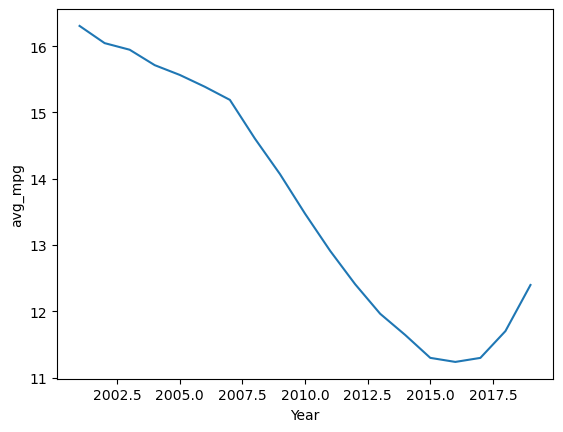

In [23]:
sns.lineplot(x='Year',y='avg_mpg',data=new_df)
plt.title('Fuel Efficiency average mpg')
plt.show()

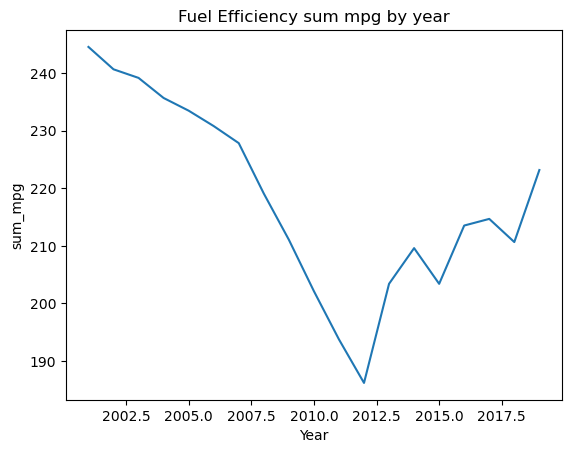

In [12]:
sns.lineplot(x='Year',y='sum_mpg',data=new_df)
plt.title('Fuel Efficiency sum mpg by year')
plt.show()

In [39]:
# Assuming your DataFrame is called df
top_countries_2019 = df[df['Year']==2019].nlargest(3, 'fuel_efficiency_per_km')['Country']
top_countries = df[df['Country'].isin(top_countries_2019)]


In [46]:
top_countries.head()

,Country,Code,Year,fuel_efficiency_per_km,mpg
95,Germany,DEU,2001,7.222864,16.989230
96,Germany,DEU,2002,7.078794,16.650355
97,Germany,DEU,2003,7.073118,16.637005
98,Germany,DEU,2004,6.959862,16.370611
99,Germany,DEU,2005,6.889021,16.203982


In [ ]:
## Pull and Plot Germany, Luxembourg and Switzerland

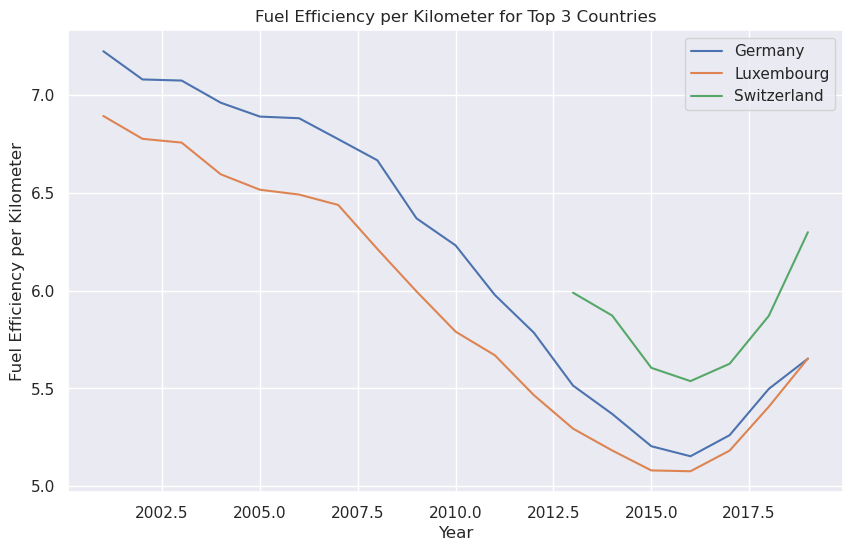

In [44]:
# Assuming you have imported seaborn as sns and matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='fuel_efficiency_per_km', hue='Country', data=top_countries)
plt.legend()
plt.title('Fuel Efficiency per Kilometer for Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Fuel Efficiency per Kilometer')
plt.show()


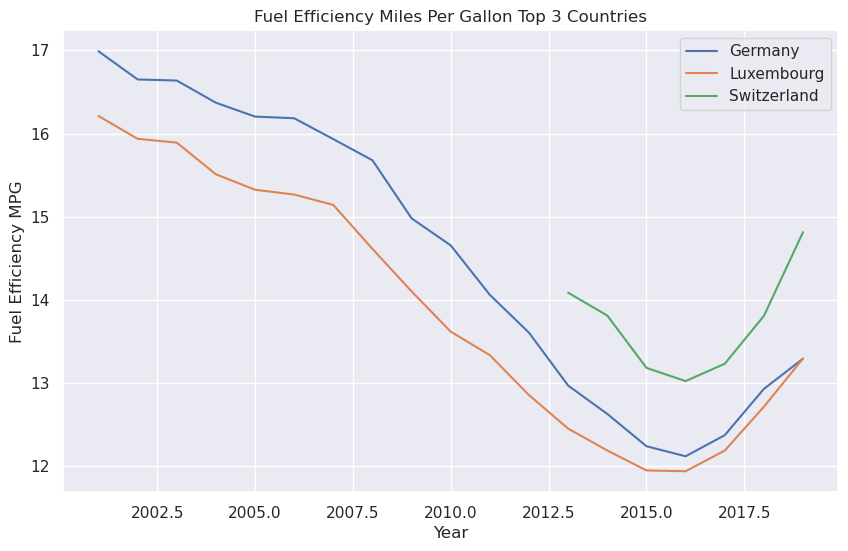

In [45]:
# Assuming you have imported seaborn as sns and matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='mpg', hue='Country', data=top_countries)
plt.legend()
plt.title('Fuel Efficiency Miles Per Gallon Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Fuel Efficiency MPG')
plt.show()
